# Introduction: International & Cultural Cuisine Diversity in Toronto Neighborhoods
## J Katz

# The Question: Which Toronto Neighborhoods have the most/least diversity of international/cultural eateries?


### This is useful information in a number of ways.  While demographic data can tell the diversity of residents in a location, the popularity of international cuisine can tell something different.  This can show an interest/open-mindedness to international cultures, which prospective residents may be interested in.  Tourists can use this information to determine where to visit for the most exciting range of restaurant options.  Furthermore, if this data is compared with demographic data, it can shed light on the strength of restaurant types as a predictor of a location's resident diversity.  Following this, one can consider, what might account for the difference between resident and restaurant cultural diversity?  

### The scope of this analysis is simply to cluster Toronto neighborhoods by their degree of diversity of restaurants.


# The Data

### The data includes Toronto postal codes (a proxy for neighborhoods) and their geographic coordinates.  This data is then combined with the categories of local venues, provided by Foursquare.  I filter the venues to include only restaurants and other eateries in the analysis.


In [40]:
toronto_restaurants.head()

,Neighborhood,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4A,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
1,M4A,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
2,M5A,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,M5A,43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
4,M5A,43.654260,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot


# Methodology


### In this project, I cluster the neighborhoods of Toronto based on the degree of cultural diversity of local restaurants and eateries.  Specifically, this project  clusters Toronto postal codes (as a proxy for neighborhoods) based on the proportion of restaurants offering international cuisines, along with the total number of restaurants/eateries in the postal code.  This offers different ways of looking at diversity of restaurants in a neighborhood.  Consider, two possible neighborhoods: A has 10 restaurants, and B has 2 restaurants.  For both A and B, half of their restaurants offer local cuisine, and half offer international cuisine.   With 5 international restaurants, A will almost certainly have a greater variety of cuisines available compared to B. 


## Categorizing Venues:

### I established counts for each cuisine type.  I categorized cuisines as either “local” or “international.”  “Local” eateries are venues of categories that do not suggest a location of their cuisine (e.g., Soup Place, Molecular Gastronomy Restaurant) or offer food that is typical for Canada or the U.S. (e.g., Poutine Place, Pizza Place).  “International” eateries are those associated with a name of a country or a region - excluding Canada and America (e.g., Filipino Restaurant, Middle Eastern Restaurant) or those offering cuisine associated with a particular country/region (e.g., Taco Place, Sushi Restaurant).  

### These categories were determined subjectively, in the hopes of meeting a general opinion of what is considered "cultural cuisine."  "International" eateries are those which contained a word on an "International Food Word List," which included possessive country words ("Brazilian", not "Brazil") and regional food words hand selected from the Toronto venue categories (e.g., "Falafel," "Poke").  Furthermore, these selected words were determined subjectively: For instance, while pizza is of Italian origin, it is ubiquitous in Canada, so I chose to consider it "local."  Another exception here is Cajun/Creole cuisine, which, while local to the U.S., offers notable culinary diversity and is thus categorized as “international.”

#### Full word lists are inlc

## Data Removal

### Entries of postal codes which had fewer than two eateries were excluded from the analysis.  Two was chosen as a threshold as the smallest number with the potential to indicate diversity.

## Clustering

### To cluster the data, I used the Kmeans clustering algorithm from sklearn.  The data was clustered by the International Eatery Rate - the proportion of eateries in a postal code in the International category, and the Eatery Count - the number of eateries in the postal code, normalized to a scale between 0 and 1 by dividing by the maximum number of eateries in a Toronto postal code.  A k value of 4 provided clearly meaningful clusters.

In [42]:
toronto_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Eatery_Count,international_rate,Cluster Labels
1,M4A,North York,Victoria Village,43.725882,-79.315572,3.0,0.333333,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,0.500000,0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,0.666667,1
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,4.0,1.000000,1
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,0.500000,0


# Results

### The Toronto restaurant data provided four meaningful clusters:

### Cluster 0 [red]: Medium proportion (ave = 0.4) of international restaurants among a small number (ave = 9) of venues.
### Cluster 1 [purple]: Majority/only international restaurants (ave = 0.8) among a small number (ave = 6) of venues.
### Cluster 2 [blue]: Medium proportion (ave = 0.4) of international restaurants among a large number (ave = 34) of venues.
### Cluster 3 [green]: Zero/few (ave = 0.04) international restaurants among a small (ave = 3.4) number of venues.


In [38]:
map_clusters

# Discussion

### Different neighborhoods of Toronto can now be identified by their level of culinary diversity.  Visitors and potential residents can now identify where to go to be in a location of greater diversity, or places which are most welcoming to diverse cultures.

### There is no clear spatial pattern of culinary diversity across Toronto.  Neighborhoods of few and many restaurants, of low and high culinary diversity, are spread throughout the city.

### I will note, the evaluation I provide is limited.  To illustrate, consider three neighborhoods, C, D & E, each with two international restaurants.  Let’s say C has an Indian restaurant and a Mexican restaurant, and D has two Chinese restaurants, and E has a Falafel place and a Middle Eastern restaurant.  In my analysis, all three  neighborhoods show the same level of diversity in “international” eateries.  This decision was made because there is a great variety of venue categories (71) compared to the number of analysed postal codes (59) and the average number of eateries in each postal code (~10). Clusters would be less meaningful if determined by each particular venue category.  To cluster by approximate region would offer another level of subjective determination (i.e., Should Middle Eastern cuisine be in the Asian category?  Is it appropriate to group German and French cuisines?).  Therefore, this analysis measures diversity simply by the the proportion of “international” cuisines and the total number of eateries in each postal code.

### This analysis does not shed light on the quality or authenticity of the restaurants.  Limited to the data from Foursquare, we can only see the relative popularity of venues.  

# Conclusion

### Moving forward with this research, it would be meaningful to analyze how accurately culinary diversity represents resident diversity, open-mindedness, and cultural acceptance.  This can be analyzed more deeply by considering the popularity of these restaurants and the authenticity of the cuisines they claim to offer. 

## The code follows:

In [1]:
#Libraries, dataframe options
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium # map rendering library
import folium 

print('Libraries imported.')

     |████████████████████████████████| 93 kB 3.4 MB/s  eta 0:00:01
Libraries imported.


In [2]:
# pandas dataframe of Toronto Postal Codes.  If no borough is assigned, the entry is removed.
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url)
df = df[0]
df = df[df.Borough != 'Not assigned'] #remove entries with non-assigned Borough

df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [3]:
# 103 unique postal codes are considered
df.shape

(103, 3)

In [4]:
# latitude and longitude coordinates are found from this file and stored as dataframe coords
url2 = 'http://cocl.us/Geospatial_data'
coords = pd.read_csv(url2)

coords

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [5]:
# df is now a dataframe providing postal codes, neighborhood names, and geospatial coordinates
df1 = df.join(coords.set_index('Postal Code'), on='Postal Code')
df = df1.reset_index(drop=True)

df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [6]:
# establish Foursquare credentials and specifications
CLIENT_ID = '0W1GHHYC5BI1FLVUHMKADPYUD0BFBXAFFNCK5LNLTIDACACW' # your Foursquare ID
CLIENT_SECRET = 'VMUFIMGXNDD3RSKUPAKR5EVEIY1EKGVK1HLUC5OGVOZLIEK4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value
radius = 500 # define radius (in meters) from postal code coordinates


In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
         # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Postal Latitude', 
                  'Postal Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
toronto_venues = getNearbyVenues(names=df['Postal Code'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

print(toronto_venues.shape)
toronto_venues.head()

(2139, 7)


,Neighborhood,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,M4A,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,M4A,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,M4A,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [9]:
# The following code is based off of code from R. Lewis, the peer I reviewed for the previous assignment.

# The word "Restaurant" does not identify all eateries.  Here I include additional keywords to create a more complete list of eateries. 
# These keywords are selected from the complete list of venue categories found in the Toronto Foursquare data.  
#The word "Shop" is intentially excluded, as it often applies to non-eatery venues. Conveniently, "Shop" is more likely to describe the category of a snack venue than a meal venue (e.g., Frozen Yogurt Shop).

restaurant_list = [venue for venue in toronto_venues['Venue Category'].unique().tolist()
                   if any(cat in venue for cat in ["Breakfast",
                                                   "Creperie",
                                                   "Gastropub"
                                                   "Joint",
                                                   "Noodle",
                                                   "Place",
                                                   "Deli",
                                                   "Cafe",
                                                   "Diner",
                                                   "Pub",
                                                   "Steakhouse",
                                                   "Restaurant"])]

#Complete list of restaurants in Toronto by Postal Code.  
toronto_restaurants = toronto_venues[toronto_venues['Venue Category'].isin(restaurant_list)].reset_index(drop = True)

#Create a column for each type of restaurant.
toronto_onehot = pd.get_dummies(toronto_restaurants[['Venue Category']], prefix = "", prefix_sep = "")

#Neighbourhood name is the first column.
toronto_onehot.insert(0, "Neighborhood", toronto_restaurants['Neighborhood'], True)


### The data provides 716 venues for the 103 postal codes [neighborhoods], and includes 70 unique eatery categories.

In [10]:

print(toronto_onehot.shape)

print(toronto_onehot)

(717, 70)
    Neighborhood  Afghan Restaurant  American Restaurant  Asian Restaurant  \
0            M4A                  0                    0                 0   
1            M4A                  0                    0                 0   
2            M5A                  0                    0                 0   
3            M5A                  0                    0                 0   
4            M5A                  0                    0                 0   
5            M5A                  0                    0                 0   
6            M5A                  0                    0                 0   
7            M5A                  0                    0                 0   
8            M5A                  0                    0                 0   
9            M5A                  0                    0                 0   
10           M6A                  0                    0                 0   
11           M7A                  0                   

### Grouping by postal code shows the 716 venues are in only 71 of the Toronto neighborhoods, suggesting an average of about 10 restaurants per neighborhood.  Now, I will limit the neighborhoods under consideration to those with at least 2 restaurant venues.  This will leave us with 59 neighborhoods under consideration, and it will allow for the comparison of variety amongst restaurant cuisines in these neighborhoods.

### Notably, this data does not tell why some neighborhoods have few restaurants.  This could be an indication of population, population density, wealth, or other socio-economic factors of these neighborhoods.

In [11]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index() # One row entry for each Postal Code

toronto_grouped['Eatery_Count'] = toronto_grouped.sum(axis = 1, skipna = True)

toronto_grouped = toronto_grouped[toronto_grouped.Eatery_Count > 1]
print(toronto_grouped.shape)
toronto_grouped.head()

(59, 71)


,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Bed & Breakfast,Belgian Restaurant,Brazilian Restaurant,Breakfast Spot,Burrito Place,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gaming Cafe,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Eatery_Count
1,M1E,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,M1G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,M1H,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
5,M1P,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
6,M1R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [12]:
# NATIONALITIES_list is a courtesty of Zamai, found on github (see https://gist.github.com/zamai/8e0d30a7f23f33e9c220c20db71c80dc#file-nationalities-py-L7 )

NATIONALITIES_list = ['Afghan', 'Albanian', 'Algerian', 'American', 'Andorran', 'Angolan', 'Antiguans', 'Argentinean', 'Armenian', 'Australian', 'Austrian', 'Azerbaijani', 
                      'Bahamian', 'Bahraini', 'Bangladeshi', 'Barbadian', 'Barbudans', 'Batswana', 'Belarusian', 'Belgian', 'Belizean', 'Beninese', 'Bhutanese', 'Bolivian', 
                      'Bosnian', 'Brazilian', 'British', 'Bruneian', 'Bulgarian', 'Burkinabe', 'Burmese', 'Burundian', 'Cambodian', 'Cameroonian', 'Canadian', 'Cape Verdean', 
                      'Central African', 'Chadian', 'Chilean', 'Chinese', 'Colombian', 'Comoran',  'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot', 'Czech', 'Danish',
                      'Djibouti', 'Dominican', 'Dutch', 'Dutchman', 'Dutchwoman', 'East Timorese', 'Ecuadorean', 'Egyptian', 'Emirian', 'Equatorial Guinean', 'Eritrean', 
                      'Estonian', 'Ethiopian', 'Fijian', 'Filipino', 'Finnish', 'French', 'Gabonese', 'Gambian', 'Georgian', 'German', 'Ghanaian', 'Greek', 'Grenadian', 
                      'Guatemalan', 'Guinea-Bissauan', 'Guinean', 'Guyanese', 'Haitian', 'Herzegovinian', 'Honduran', 'Hungarian', 'I-Kiribati', 'Icelander', 'Indian', 
                      'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli', 'Italian', 'Ivorian', 'Jamaican', 'Japanese', 'Jordanian', 'Kazakhstani', 'Kenyan', 
                      'Kittian and Nevisian', 'Kuwaiti', 'Kyrgyz', 'Laotian', 'Latvian', 'Lebanese', 'Liberian', 'Libyan', 'Liechtensteiner', 'Lithuanian', 'Luxembourger', 
                      'Macedonian', 'Malagasy', 'Malawian', 'Malaysian', 'Maldivan', 'Malian', 'Maltese', 'Marshallese', 'Mauritanian', 'Mauritian', 'Mexican', 'Micronesian', 
                      'Moldovan', 'Monacan', 'Mongolian', 'Moroccan', 'Mosotho', 'Motswana', 'Mozambican', 'Namibian', 'Nauruan', 'Nepalese', 'Netherlander', 'New Zealander', 
                      'Ni-Vanuatu', 'Nicaraguan', 'Nigerian', 'Nigerien', 'North Korean', 'Northern Irish', 'Norwegian', 'Omani', 'Pakistani', 'Palauan', 'Panamanian', 
                      'Papua New Guinean', 'Paraguayan', 'Peruvian', 'Polish', 'Portuguese', 'Qatari', 'Romanian', 'Russian', 'Rwandan', 'Saint Lucian', 'Salvadoran', 'Samoan',
                      'San Marinese', 'Sao Tomean', 'Saudi', 'Scottish', 'Senegalese', 'Serbian', 'Seychellois', 'Sierra Leonean', 'Singaporean', 'Slovakian', 'Slovenian', 
                      'Solomon Islander', 'Somali', 'South African', 'South Korean', 'Spanish', 'Sri Lankan', 'Sudanese', 'Surinamer', 'Swazi', 'Swedish', 'Swiss', 'Syrian', 
                      'Taiwanese', 'Tajik', 'Tanzanian', 'Thai', 'Togolese', 'Tongan', 'Trinidadian or Tobagonian', 'Tunisian', 'Turkish', 'Tuvaluan', 'Ugandan', 'Ukrainian', 
                      'Uruguayan', 'Uzbekistani', 'Venezuelan', 'Vietnamese', 'Welsh', 'Yemenite', 'Zambian', 'Zimbabwean']

print(len(NATIONALITIES_list))

197


In [13]:
# This following list is not perfect- these words were chosen by me from looking at the list of Toronto venue categories.  This list might not be all-inclusive.
International_Food_Word_list = NATIONALITIES_list 
International_Food_Word_list.extend(('Asian', 'Creole', 'Caribbean', 'Dim Sum', 'Dumpling', 'European', 'Falafel', 'Malay', 'Mediterranean', 
                                     'Middle Eastern', 'Ramen', 'Sushi', 'Taco', 'Doner', 'Poke'))
#International_Food_Word_list

In [14]:
# Here I consider "American" and "Canadian" cuisines to be local to Toronto.
International_Food_Word_list.remove('American')
International_Food_Word_list.remove('Canadian')

print(len(International_Food_Word_list))

210


In [15]:
col_list = list(toronto_grouped)
col_list


['Neighborhood',
 'Afghan Restaurant',
 'American Restaurant',
 'Asian Restaurant',
 'Bed & Breakfast',
 'Belgian Restaurant',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Burrito Place',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'College Cafeteria',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Creperie',
 'Cuban Restaurant',
 'Deli / Bodega',
 'Dim Sum Restaurant',
 'Diner',
 'Doner Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'Gaming Cafe',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Hakka Restaurant',
 'Indian Restaurant',
 'Irish Pub',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean BBQ Restaurant',
 'Korean Restaurant',
 'Latin American Restaurant',
 'Malay Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Mode

In [16]:
# local cuisine venue categories: these are the venue categories that do not include International Food Words
local_categories= col_list
local_categories.remove('Eatery_Count')
for word in International_Food_Word_list:
    local_categories = [x for x in local_categories if not word in x]


print(len(local_categories))
print(local_categories)

33
['Neighborhood', 'American Restaurant', 'Bed & Breakfast', 'Breakfast Spot', 'Burrito Place', 'College Cafeteria', 'Comfort Food Restaurant', 'Creperie', 'Deli / Bodega', 'Diner', 'Fast Food Restaurant', 'Gaming Cafe', 'Gluten-free Restaurant', 'Hakka Restaurant', 'Korean BBQ Restaurant', 'Korean Restaurant', 'Latin American Restaurant', 'Molecular Gastronomy Restaurant', 'New American Restaurant', 'Noodle House', 'Pizza Place', 'Poutine Place', 'Pub', 'Restaurant', 'Salad Place', 'Sandwich Place', 'Seafood Restaurant', 'Snack Place', 'Soup Place', 'Southern / Soul Food Restaurant', 'Steakhouse', 'Theme Restaurant', 'Vegetarian / Vegan Restaurant']


In [17]:
toronto_grouped['Local Cuisine'] = toronto_grouped[local_categories].sum(axis=1)
toronto_grouped['International Cuisine'] = toronto_grouped['Eatery_Count'] - toronto_grouped['Local Cuisine']
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Bed & Breakfast,Belgian Restaurant,Brazilian Restaurant,Breakfast Spot,Burrito Place,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gaming Cafe,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Eatery_Count,Local Cuisine,International Cuisine
1,M1E,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1
2,M1G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1
3,M1H,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,2
5,M1P,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,4
6,M1R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d3941710>,
      dtype=object)

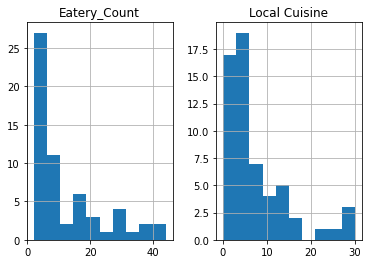

In [18]:
# Visualize distribution of the number of eateries, and compare with the number of local eateries.  Notice that y axes have different limits.
hist = toronto_grouped[['Eatery_Count', 'Local Cuisine']].hist()
hist
                       

In [19]:
# toronto_cuisine dataframe retains the international/cultural diversity of restaurant venues, and simplifies all local cuisine eateries to one column.  Eatery Count is kept, as it still informs of the food-scene of the neighborhood.
toronto_cuisine = toronto_grouped.drop(columns = local_categories)
toronto_cuisine['local_rate'] = toronto_cuisine['Local Cuisine'] / toronto_cuisine['Eatery_Count']
toronto_cuisine['international_rate'] = 1 - toronto_cuisine['local_rate']
toronto_cuisine = toronto_cuisine.drop(columns = ['International Cuisine'])
toronto_cuisine = toronto_cuisine.drop(columns = ['Local Cuisine'])
toronto_cuisine.head()

,Afghan Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Poke Place,Portuguese Restaurant,Ramen Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Turkish Restaurant,Vietnamese Restaurant,Eatery_Count,local_rate,international_rate
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.666667,0.333333
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.500000,0.500000
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0.333333,0.666667
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0.000000,1.000000
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0.500000,0.500000


In [22]:
max(toronto_cuisine['Eatery_Count'])
toronto_cuisine.shape

(59, 40)

In [23]:
cluster_test = toronto_cuisine.iloc[:, [37, 39]]
cluster_test['Eatery_Count'] = cluster_test['Eatery_Count']/max(cluster_test['Eatery_Count'])  #Normalize Eatery Count from 0 to 1
cluster_test

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Eatery_Count,international_rate
1,0.068182,0.333333
2,0.045455,0.500000
3,0.068182,0.666667
5,0.090909,1.000000
6,0.045455,0.500000
7,0.045455,0.000000
8,0.159091,0.428571
9,0.159091,0.285714
11,0.340909,0.400000
12,0.045455,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7503952e50>]],
      dtype=object)

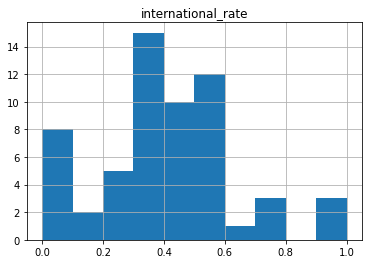

In [24]:
toronto_cuisine[['international_rate']].hist(bins = 10)


## Now, we will cluster the neighborhoods by the diversity of eateries.

In [25]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [32]:
# 
kclusters = 4

toronto_cluster = cluster_test

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 3,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 3, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3], dtype=int32)

In [33]:
toronto_cluster['Cluster Labels'] = kmeans.labels_
toronto_cluster.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Eatery_Count,international_rate,Cluster Labels
1,0.068182,0.333333,0
2,0.045455,0.500000,0
3,0.068182,0.666667,1
5,0.090909,1.000000,1
6,0.045455,0.500000,0


In [34]:
toronto_merged = df
#toronto_clustered = toronto_cluster

# merge toronto_grouped with toronto_data [df] to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_cluster, how = 'inner') #.set_index('Neighborhood'), on='Postal Code')
toronto_merged['Eatery_Count'] = toronto_merged['Eatery_Count'] * max(toronto_cuisine['Eatery_Count']) # de-normalize Eatery_Count
toronto_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Eatery_Count,international_rate,Cluster Labels
1,M4A,North York,Victoria Village,43.725882,-79.315572,3.0,0.333333,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,0.500000,0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,0.666667,1
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,4.0,1.000000,1
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,0.500000,0


In [35]:
map_clusters = folium.Map(location=[43.657162, -79.378937], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters + 1)] # plus 1 to account for un-clustered postal codes
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [36]:
markers_colors = []


for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    c = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(c-1)],
        fill=True,
        fill_color=rainbow[(c-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
#examine clusters
n = max(toronto_merged['Cluster Labels']) + .1
n

i = 0
while i < n:
    print('Cluster ' + str(i) + ':' )
    print(toronto_merged.loc[toronto_merged['Cluster Labels'] == i, toronto_merged.columns[[0, 5,6, 7]]]) 
    print('Average Eatery Count and Average International Eatery Rate: ' )
    print(toronto_merged.groupby('Cluster Labels', as_index=False)[['Eatery_Count', 'international_rate']].mean().iloc[i, [1,2]])
    print()
    i += 1

Cluster 0:
   Postal Code  Eatery_Count  international_rate  Cluster Labels
1          M4A           3.0            0.333333               0
2          M5A           2.0            0.500000               0
6          M1B           2.0            0.500000               0
8          M4B           7.0            0.428571               0
9          M5B           7.0            0.285714               0
11         M9B          15.0            0.400000               0
13         M3C          16.0            0.562500               0
17         M9C           8.0            0.375000               0
19         M4E           2.0            0.500000               0
22         M1G           5.0            0.400000               0
23         M4G           8.0            0.375000               0
25         M6G           9.0            0.222222               0
26         M1H           9.0            0.333333               0
28         M3H           5.0            0.400000               0
29         M4H